<a href="https://colab.research.google.com/github/BweepBwop/DSP/blob/main/Activity_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sampling Theorem**

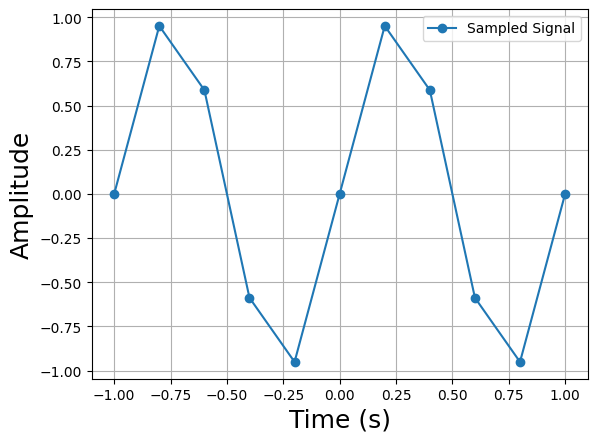

In [ ]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

# Create a figure and axis for plotting
fig, ax = plt.subplots()

# Define the frequency of the signal and the sampling rate
f = 1.0  # Hz, signal frequency
fs = 5.0  # Hz, sampling rate (should be >= 2*f for Nyquist criterion)

# Generate time intervals, symmetric around 0
t = np.arange(-1, 1 + 1/fs, 1/fs)

# Generate the sinusoidal signal
x = np.sin(2 * np.pi * f * t)

# Plot the sampled signal
ax.plot(t, x, 'o-', label='Sampled Signal')

# Set labels with appropriate fontsize
ax.set_xlabel('Time (s)', fontsize=18)
ax.set_ylabel('Amplitude', fontsize=18)

# Show grid and plot
ax.grid(True)
ax.legend()
plt.show()


This shows the sine function and its samples. Note that
sampling density is independent of the local curvature of the function. It may seem like it makes
more sense to sample more densely where the function is curviest, but the sampling theorem has
no such requirement sampling theorem doesn’t specify where we should sample as long as we sample at
a periodic intervals. This means that on the up and down slopes of the sine, which
are linear-looking and which would need fewer samples to characterize, we take the
sample density as near the curvy peaks.

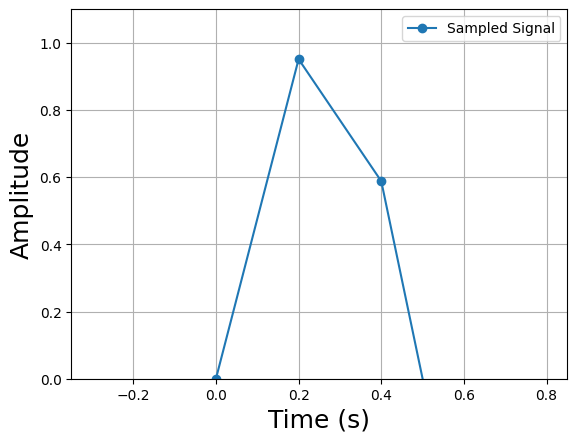

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a figure and axis for plotting
fig, ax = plt.subplots()

# Define the frequency of the signal and the sampling rate
f = 1.0  # Hz, signal frequency
fs = 5.0  # Hz, sampling rate

# Generate time intervals, symmetric around 0
t = np.arange(-1, 1 + 1/fs, 1/fs)

# Generate the sinusoidal signal
x = np.sin(2 * np.pi * f * t)

# Plot the sampled signal
ax.plot(t, x, 'o-', label='Sampled Signal')

# Set axis limits
ax.axis(xmin=1/(4*f)-1/fs*3, xmax=1/(4*f)+1/fs*3, ymin=0, ymax=1.1)

# Set labels with appropriate fontsize
ax.set_xlabel('Time (s)', fontsize=18)
ax.set_ylabel('Amplitude', fontsize=18)

# Show grid and plot
ax.grid(True)
ax.legend()
plt.show()


On the third line, we establish the limits of
the axis using keyword arguments. This enhances clarity because the reader does not have to
otherwise look up the positional arguments instead.

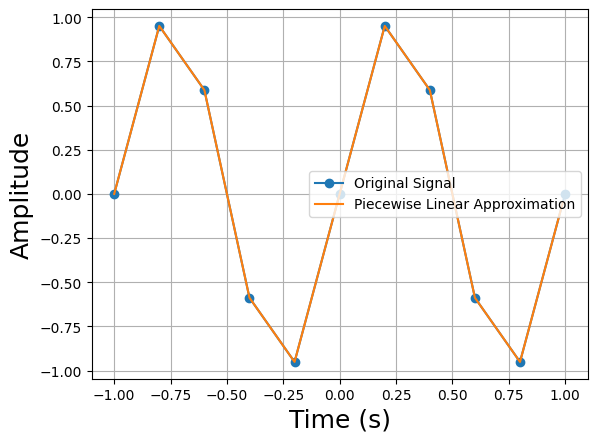

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the frequency of the signal and the sampling rate
f = 1.0  # Hz, signal frequency
fs = 5.0  # Hz, sampling rate

# Generate time intervals, symmetric around 0
t = np.arange(-1, 1 + 1/fs, 1/fs)

# Generate the sinusoidal signal
x = np.sin(2 * np.pi * f * t)

# Piecewise linear approximation
interval = []  # piecewise domains
apprx = []     # lines on the domains

# Build up points evenly inside of intervals
tp = np.hstack([np.linspace(t[i], t[i+1], 20, False) for i in range(len(t)-1)])

# Construct arguments for piecewise
for i in range(len(t)-1):
    interval.append(np.logical_and(t[i] <= tp, tp < t[i+1]))
    apprx.append((x[i+1]-x[i])/(t[i+1]-t[i]) * (tp[interval[-1]] - t[i]) + x[i])

# Create a piecewise linear approximation using the calculated intervals and approximations
x_hat = np.piecewise(tp, interval, apprx)

# Plot the original signal and the piecewise approximation
fig, ax = plt.subplots()
ax.plot(t, x, 'o-', label='Original Signal')
ax.plot(tp, x_hat, '-', label='Piecewise Linear Approximation')

# Set labels and title
ax.set_xlabel('Time (s)', fontsize=18)
ax.set_ylabel('Amplitude', fontsize=18)
ax.legend()

# Show grid and plot
ax.grid(True)
plt.show()


Code for constructing the piecewise linear approximation. The hstack function
packs smaller arrays horizontally into a larger array. The remainder of the code formats the
respective inputs for Numpy’s piecewise linear interpolating function.

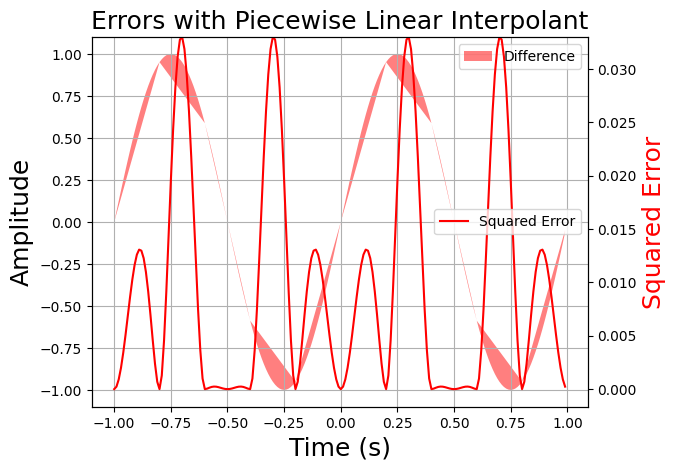

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the frequency of the signal and the sampling rate
f = 1.0  # Hz, signal frequency
fs = 5.0  # Hz, sampling rate

# Generate time intervals, symmetric around 0
t = np.arange(-1, 1 + 1/fs, 1/fs)

# Generate the sinusoidal signal
x = np.sin(2 * np.pi * f * t)

# Piecewise linear approximation
interval = []  # piecewise domains
apprx = []     # lines on the domains

# Build up points evenly inside of intervals
tp = np.hstack([np.linspace(t[i], t[i+1], 20, False) for i in range(len(t)-1)])

# Construct arguments for piecewise
for i in range(len(t)-1):
    interval.append(np.logical_and(t[i] <= tp, tp < t[i+1]))
    apprx.append((x[i+1] - x[i]) / (t[i+1] - t[i]) * (tp[interval[-1]] - t[i]) + x[i])

# Create a piecewise linear approximation using the calculated intervals and approximations
x_hat = np.piecewise(tp, interval, apprx)

# Create the plot for the original signal and the approximation
fig, ax1 = plt.subplots()

# Fill in the difference between the interpolant and the sine
ax1.fill_between(tp, x_hat, np.sin(2 * np.pi * f * tp), facecolor='red', alpha=0.5, label='Difference')

# Set labels for the first axis
ax1.set_xlabel('Time (s)', fontsize=18)
ax1.set_ylabel('Amplitude', fontsize=18)

# Create a twin axis
ax2 = ax1.twinx()  # create clone of ax1

# Compute squared error
sqe = (x_hat - np.sin(2 * np.pi * f * tp)) ** 2

# Plot the squared error
ax2.plot(tp, sqe, 'r', label='Squared Error')

# Set axis limits for the second axis
ax2.axis(ymax=sqe.max())

# Set labels for the second axis
ax2.set_ylabel('Squared Error', color='r', fontsize=18)

# Set the title of the plot
ax1.set_title('Errors with Piecewise Linear Interpolant', fontsize=18)

# Show grid and plot
ax1.grid(True)
ax1.legend()
ax2.legend()
plt.show()


Line 2 uses fill_between to fill in the convex
region between the x_hat and the sin function with the given facecolor. Because we want
a vertical axis on both sides of the figure, we use the twinx function to create the duplicated
axis. This shows the value of keeping separate variables for axes *(i.e. ax1,ax2).*

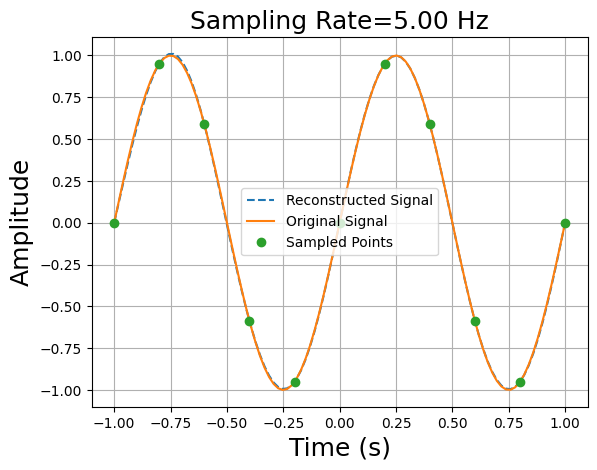

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the frequency of the signal and the sampling rate
f = 1.0  # Hz, signal frequency
fs = 5.0  # Hz, sampling rate

# Create the figure and axis
fig, ax = plt.subplots()

# Redefine time intervals for convenience
t = np.linspace(-1, 1, 100)  # continuous time points
ts = np.arange(-1, 1 + 1/fs, 1/fs)  # sample points

# Number of coefficients for the reconstruction
num_coeffs = len(ts)
sm = 0  # Initialize the summation for the sinc reconstruction

# Compute the sinc reconstruction
for k in range(-num_coeffs, num_coeffs):  # need both sides since the function is real
    sm += np.sin(2 * np.pi * (k/fs)) * np.sinc(k - fs * t)

# Plot the sampled signal and the reconstruction
ax.plot(t, sm, '--', label='Reconstructed Signal')
ax.plot(t, np.sin(2 * np.pi * t), label='Original Signal')
ax.plot(ts, np.sin(2 * np.pi * ts), 'o', label='Sampled Points')

# Set the title and labels
ax.set_title('Sampling Rate=%3.2f Hz' % fs, fontsize=18)
ax.set_xlabel('Time (s)', fontsize=18)
ax.set_ylabel('Amplitude', fontsize=18)
ax.legend()

# Show grid and plot
ax.grid(True)
plt.show()


shows that you can draw multiple lines with a
single plot function. The only drawback is that you cannot later refer to the lines individually
using the legend function. Note the squared-error here is imperceptible in this plot due to
improved interpolant.

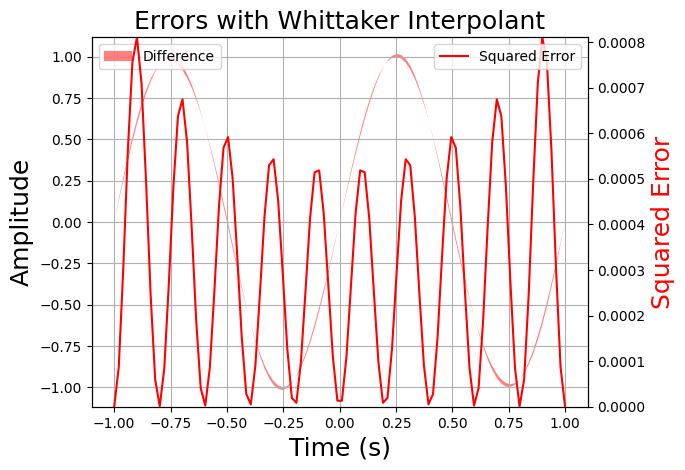

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the frequency of the signal and the sampling rate
f = 1.0  # Hz, signal frequency
fs = 5.0  # Hz, sampling rate

# Time points for continuous signal and reconstruction
t = np.linspace(-1, 1, 100)  # continuous time points

# Reconstructed signal (using sinc reconstruction, for example)
sm = 0
num_coeffs = int(fs * (t[-1] - t[0]))  # based on sample points
for k in range(-num_coeffs, num_coeffs):
    sm += np.sin(2 * np.pi * (k/fs)) * np.sinc(k - fs * t)

# Create figure and axis
fig, ax1 = plt.subplots()

# Plot the difference between the reconstructed signal and the original sine
ax1.fill_between(t, sm, np.sin(2 * np.pi * f * t), facecolor='red', alpha=0.5, label='Difference')
ax1.set_ylabel('Amplitude', fontsize=18)
ax1.set_xlabel('Time (s)', fontsize=18)

# Create a twin axis for squared error
ax2 = ax1.twinx()

# Compute squared error
sqe = (sm - np.sin(2 * np.pi * f * t)) ** 2

# Plot squared error
ax2.plot(t, sqe, 'r', label='Squared Error')

# Set axis limits and labels for the squared error
ax2.set_ylim(0, sqe.max())
ax2.set_ylabel('Squared Error', color='r', fontsize=18)

# Set title and grid
ax1.set_title(r'Errors with Whittaker Interpolant', fontsize=18)
ax1.grid(True)

# Show legends for clarity
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.show()


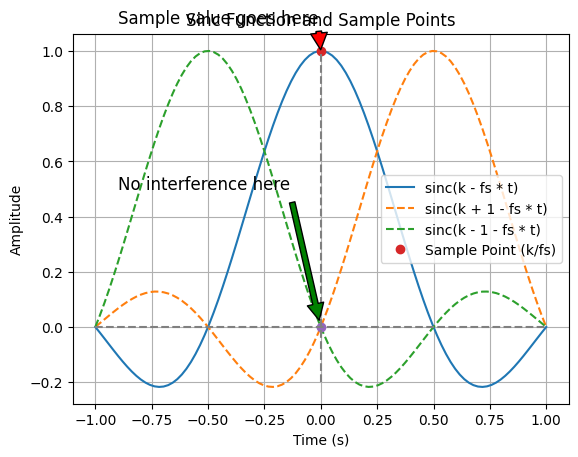

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define time values
t = np.linspace(-1, 1, 100)  # continuous time points
k = 0  # central index
fs = 2  # sampling frequency for easier visualization

# Create figure and axis
fig, ax = plt.subplots()

# Plot sinc functions for k, k+1, and k-1
ax.plot(t, np.sinc(k - fs * t), label=f'sinc(k - fs * t)')
ax.plot(t, np.sinc(k + 1 - fs * t), '--', label=f'sinc(k + 1 - fs * t)')
ax.plot(t, np.sinc(k - 1 - fs * t), '--', label=f'sinc(k - 1 - fs * t)')

# Highlight sample points
ax.plot(k/fs, 1, 'o', label='Sample Point (k/fs)')
ax.plot(-k/fs, 0, 'o')

# Add horizontal and vertical lines
ax.hlines(0, -1, 1, colors='gray', linestyles='dashed')  # horizontal line
ax.vlines(0, -0.2, 1, colors='gray', linestyles='dashed')  # vertical line

# Add annotations
ax.annotate('Sample value goes here',
            xy=(0, 1),  # arrowhead position
            xytext=(-0.9, 1.1),  # text position
            arrowprops={'facecolor': 'red', 'shrink': 0.05},
            fontsize=12)

ax.annotate('No interference here',
            xy=(0, 0),  # arrowhead position
            xytext=(-0.9, 0.5),  # text position
            arrowprops={'facecolor': 'green', 'shrink': 0.05},
            fontsize=12)

# Set labels and title
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('Sinc Function and Sample Points')

# Add grid and legend
ax.grid(True)
ax.legend()

# Show plot
plt.show()


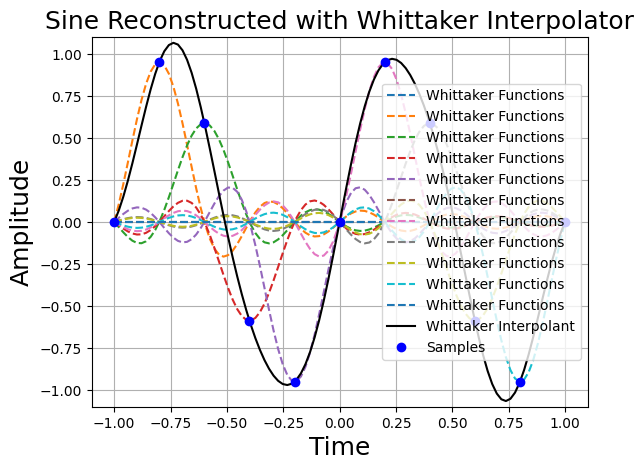

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sampling rate
fs = 5.0  # Hz

# Define time array
t = np.linspace(-1, 1, 100)  # continuous time points

# Create a sorted coefficient list based on time samples
k = np.array(sorted(set((t * fs).astype(int))))

# Create figure and axis
fig, ax = plt.subplots()

# Calculate individual Whittaker functions
whittaker_functions = (np.sin(2 * np.pi * (k[:, None] / fs)) * np.sinc(k[:, None] - fs * t))

# Plot individual Whittaker functions
ax.plot(t, whittaker_functions.T, '--', label='Whittaker Functions')

# Sum to get the Whittaker interpolant
whittaker_interpolant = whittaker_functions.sum(axis=0)
ax.plot(t, whittaker_interpolant, 'k-', label='Whittaker Interpolant')

# Plot the sampled points
ax.plot(k / fs, np.sin(2 * np.pi * k / fs), 'ob', label='Samples')

# Set labels and title
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Amplitude', fontsize=18)
ax.set_title('Sine Reconstructed with Whittaker Interpolator', fontsize=18)

# Set axis limits
ax.axis((-1.1, 1.1, -1.1, 1.1))

# Add grid and legend
ax.grid(True)
ax.legend()

# Show plot
plt.show()


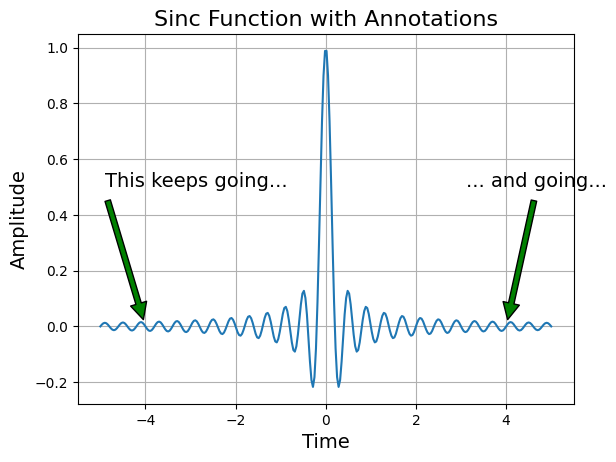

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time array for plotting
t = np.linspace(-5, 5, 300)

# Create the figure and axis
fig, ax = plt.subplots()

# Define the sampling rate
fs = 5.0  # Hz

# Plot the sinc function
ax.plot(t, np.sinc(fs * t))

# Add grid to the axes
ax.grid(True)

# Add the first annotation
ax.annotate('This keeps going...',
            xy=(-4, 0),  # position of the arrowhead
            xytext=(-5 + 0.1, 0.5),  # position of the text
            arrowprops={'facecolor': 'green', 'shrink': 0.05},
            fontsize=14)

# Add the second annotation
ax.annotate('... and going...',
            xy=(4, 0),  # position of the arrowhead
            xytext=(3 + 0.1, 0.5),  # position of the text
            arrowprops={'facecolor': 'green', 'shrink': 0.05},
            fontsize=14)

# Set axis labels
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Amplitude', fontsize=14)

# Set the title
ax.set_title('Sinc Function with Annotations', fontsize=16)

# Show the plot
plt.show()


# **Student Activity: Exploring Sampling Theory using Python**
**Objective:**

Students will understand and explore key concepts of sampling theory, including:

1. The Nyquist-Shannon Sampling Theorem.
2. Aliasing due to undersampling.
3. Reconstruction of signals using sinc interpolation.
**Pre-requisites:**
1. Basic knowledge of sine waves and signals.
2. Understanding of Nyquist rate, sampling rate, and aliasing.
3. Familiarity with Python, matplotlib, and numpy.

# **Part 1: Nyquist-Shannon Sampling Theorem**
**Goal:**
Visualize a sine wave and demonstrate the importance of sampling at the Nyquist rate.

**Activity:**

1. Generate and Plot a Continuous Sine Wave: First, plot a sine wave with a frequency $f = 1 Hz$. Use a high resolution to simulate a continuous signal.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
f = 1.0  # frequency in Hz
t = np.linspace(0, 2, 1000)  # time values from 0 to 2 seconds
signal = np.sin(2 * np.pi * f * t)

# Plot the continuous sine wave
fig, ax = plt.subplots()
ax.plot(t, signal)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('Continuous Sine Wave (f = 1 Hz)')
plt.grid(True)
plt.show()


2. Sample the Signal at the Nyquist Rate:

The Nyquist rate is twice the signal frequency. For a $1 Hz$ signal, the Nyquist rate is $2 Hz$.

In [ ]:
# Sampling rate at Nyquist rate (fs >= 2*f)
fs = 2.0  # Hz
ts = np.arange(0, 2, 1/fs)  # sample times
sampled_signal = np.sin(2 * np.pi * f * ts)

# Plot the sampled signal
fig, ax = plt.subplots()
ax.plot(t, signal, label='Original Signal')
ax.stem(ts, sampled_signal, linefmt='r-', markerfmt='ro', basefmt=" ", label='Sampled Signal')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('Sine Wave Sampled at Nyquist Rate (fs = 2 Hz)')
ax.legend()
plt.grid(True)
plt.show()


**QUESTIONS:**

1. Why is the Nyquist rate important for signal sampling?
2. What happens when the signal is sampled at exactly twice the frequency?

# **Part 2: Aliasing and Undersampling**

**Goal:**
Show how undersampling can lead to aliasing.

**Activity:**

1. Sample the Signal Below the Nyquist Rate (Undersampling):


Now, reduce the sampling rate to $1.5 Hz$, which is less than the Nyquist rate for a $1 Hz$ signal.

In [ ]:
# Sampling rate below Nyquist rate (aliasing effect)
fs_undersample = 1.5  # Hz
ts_undersample = np.arange(0, 2, 1/fs_undersample)  # sample times
sampled_signal_undersample = np.sin(2 * np.pi * f * ts_undersample)

# Plot the undersampled signal
fig, ax = plt.subplots()
ax.plot(t, signal, label='Original Signal')
ax.stem(ts_undersample, sampled_signal_undersample, linefmt='g-', markerfmt='go', basefmt=" ", label='Undersampled Signal')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('Aliasing due to Undersampling (fs = 1.5 Hz)')
ax.legend()
plt.grid(True)
plt.show()


**Questions:**

1. What do you observe when the sampling rate is lower than the Nyquist rate?
2. How does aliasing manifest in the plot? What does the undersampled signal look like compared to the original signal?

# **Part 3: Signal Reconstruction using Sinc Interpolation**
**Goal:**

Reconstruct a signal from its samples using sinc interpolation.

**Activity:**

1. Reconstruct Signal Using Sinc Interpolation:

The sinc function can be used to interpolate between the sampled points and reconstruct the original signal. This part shows how sinc interpolation works to recover a signal.

In [ ]:
# Sinc interpolation to reconstruct the signal
def sinc_interp(x, s, t):
    """
    Reconstructs a signal using sinc interpolation.
    x : sample points
    s : sample times
    t : reconstruction times
    """
    sinc_matrix = np.tile(t, (len(s), 1)) - np.tile(s[:, np.newaxis], (1, len(t)))
    return np.dot(x, np.sinc(sinc_matrix))

# Reconstruct the signal
t_reconstructed = np.linspace(0, 2, 1000)  # reconstruction times
reconstructed_signal = sinc_interp(sampled_signal, ts, t_reconstructed)

# Plot the original, sampled, and reconstructed signal
fig, ax = plt.subplots()
ax.plot(t, signal, label='Original Signal')
ax.stem(ts, sampled_signal, linefmt='r-', markerfmt='ro', basefmt=" ", label='Sampled Signal')
ax.plot(t_reconstructed, reconstructed_signal, 'g--', label='Reconstructed Signal (Sinc Interpolation)')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('Signal Reconstruction using Sinc Interpolation')
ax.legend()
plt.grid(True)
plt.show()


**Questions:**
1. How well does the sinc interpolation reconstruct the original signal?
2. What factors might affect the accuracy of signal reconstruction?


# **Part 4: Advanced Activity - Effects of Different Sampling Rates**
**Goal:**

Compare the quality of signal reconstruction for different sampling rates.

**Activity:**

1. Repeat the reconstruction process for various sampling rates, such as $3 Hz$, $4 Hz$, and $5 Hz$, and compare the results.
2. Adjust the reconstruction plot to show how increasing the sampling rate improves signal reconstruction.

In [ ]:
# Try with different sampling rates
fs_list = [3.0, 4.0, 5.0]

for fs in fs_list:
    ts = np.arange(0, 2, 1/fs)
    sampled_signal = np.sin(2 * np.pi * f * ts)
    reconstructed_signal = sinc_interp(sampled_signal, ts, t_reconstructed)

    # Plot
    fig, ax = plt.subplots()
    ax.plot(t, signal, label='Original Signal')
    ax.stem(ts, sampled_signal, linefmt='r-', markerfmt='ro', basefmt=" ", label=f'Sampled at fs={fs} Hz')
    ax.plot(t_reconstructed, reconstructed_signal, 'g--', label='Reconstructed Signal')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    ax.set_title(f'Signal Reconstruction (fs={fs} Hz)')
    ax.legend()
    plt.grid(True)
    plt.show()


**Questions:**
1. How does the reconstruction improve as you increase the sampling rate?
2. What happens when the sampling rate is much higher than the Nyquist rate?